In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from scipy.stats import entropy
from math import log, e

from sklearn import preprocessing
from sklearn.metrics import f1_score

from sklearn.neighbors import LocalOutlierFactor

from IPython.core.pylabtools import figsize
import mxnet as mx
from mxnet import nd, autograd, gluon

In [26]:
#drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/glass.data')


In [27]:
def LOF_plot(k):
  clf = LocalOutlierFactor(n_neighbors=30, contamination=.1)
  y_pred = clf.fit_predict(df)
  LOF_Scores = clf.negative_outlier_factor_
  LOF_pred=pd.Series(y_pred).replace([-1,1],[1,0])
  LOF_anomalies=df[LOF_pred==1]
  
  plt.title("Local Outlier Factor (LOF), K={}".format(k))
  plt.scatter(df.iloc[:, 1], df.iloc[:, 2], color='k', s=3., label='Data points')
  radius = (LOF_Scores.max() - LOF_Scores) / (LOF_Scores.max() - LOF_Scores.min())
  plt.scatter(df.iloc[:, 1], df.iloc[:, 2], s=1000 * radius, edgecolors='r',facecolors='none', label='Outlier scores')
  plt.axis('tight')
  plt.ylabel("{}".format(df.columns[1]))
  plt.xlabel("{}".format(df.columns[2]))
  legend = plt.legend(loc='upper left')
  legend.legendHandles[0]._sizes = [10]
  legend.legendHandles[1]._sizes = [20]
  plt.show();

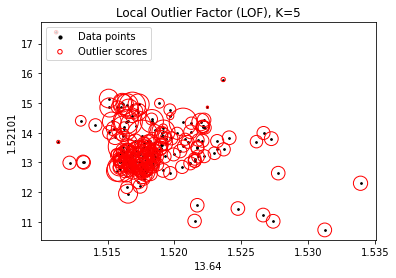

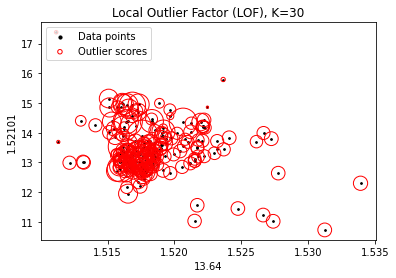

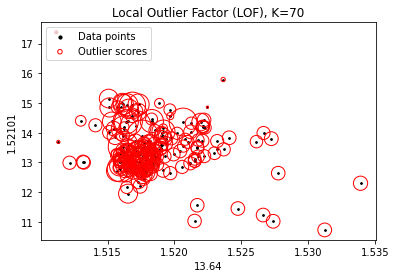

In [28]:
LOF_plot(5)
LOF_plot(30)
LOF_plot(70)